# Description des données

Dans un premier temps, nous cherchons à comprendre le jeu de données mis à disposition.

## Packages

Voici la liste des packages utilisés pour étudier les données.

In [38]:
import numpy as np
import pandas as pd
import pandas_profiling as pp

In [19]:
# Autres packages outils
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Importation

Importation des données brutes. Voici un aperçu des 5 premières lignes du jeu de données.

In [20]:
train = pd.read_csv("https://www.data.mclavier.com/prj_datascience/brut_train.csv")
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,30,1,28,0,1-2 Year,Yes,26891,155,270,1
1,Male,28,1,28,1,< 1 Year,No,45434,152,146,0
2,Male,32,1,47,0,1-2 Year,No,2630,157,195,1
3,Male,54,1,28,0,1-2 Year,No,41420,26,121,0
4,Male,45,1,36,0,1-2 Year,Yes,32764,124,185,1


## Pandas profiling

Avant de commencer une analyse manuelle des variables, nous utilisons la librairie *pandas_profiling* pour avoir une première analyse rapide de notre jeu de données.

In [21]:
profile = pp.ProfileReport(train, title = "ISFA - Groupe 1 | Insurance cross-selling")
profile.to_file("data_desc.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 100.39it/s]


Le rapport de *pandas_profiling* est <a href = "https://www.data.mclavier.com/prj_datascience/data_desc.html" target = "_blank">disponible ici</a>.

Ce rapport permet de faire un état des lieux des variables et de se rendre compte de certains points à faire attention.

Notamment : 
- Des âges supérieurs à 100 ans
- Des personnes sans permis de conduire
- La prédominance de certaines régions (sans doute urbaines et rurales)
- La prédominance de certains canaux de vente sur d'autres 
- Le taux de réponse positive : 20.6 %
- La corrélation de la variable Response à : Age, Previously_Insured et Policy_Sales_Channel


## Analyse manuelle

En complément de l'analyse du rapport <a href = "https://www.data.mclavier.com/prj_datascience/data_desc.html" target = "_blank">pandas_profiling</a>, nous réalisons quelques graphes pour mieux comprendre le jeux de données.

### Généralités

Voicil la liste des variables présentent dans le jeu de données :

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65641 entries, 0 to 65640
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Gender                65641 non-null  object
 1   Age                   65641 non-null  int64 
 2   Driving_License       65641 non-null  int64 
 3   Region_Code           65641 non-null  int64 
 4   Previously_Insured    65641 non-null  int64 
 5   Vehicle_Age           65641 non-null  object
 6   Vehicle_Damage        65641 non-null  object
 7   Annual_Premium        65641 non-null  int64 
 8   Policy_Sales_Channel  65641 non-null  int64 
 9   Vintage               65641 non-null  int64 
 10  Response              65641 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 5.5+ MB


Nous pouvons constater qu'il y a 66 641 lignes et qu'il n'y a aucune valeur manquante.

Nous appelons par la suite la fonction permettant d'avoir une description de nos variables quantitatives.

In [23]:
train[['Age', 'Driving_License', 'Previously_Insured', 'Annual_Premium', 'Response']].describe().round(2)

,Age,Driving_License,Previously_Insured,Annual_Premium,Response
count,65641.00,65641.00,65641.00,65641.00,65641.00
mean,39.92,1.00,0.42,30595.49,0.21
std,16.57,0.05,0.49,16977.74,0.40
min,20.00,0.00,0.00,2630.00,0.00
25%,25.00,1.00,0.00,24379.00,0.00
50%,38.00,1.00,0.00,31798.00,0.00
75%,50.00,1.00,1.00,39583.00,0.00
max,156.00,1.00,1.00,340439.00,1.00


Nous n'en faisons pas plus car toutes ces analyses classiques sont déjà réalisées dans <a href = "https://www.data.mclavier.com/prj_datascience/data_desc.html">pandas_profiling</a>. Nous recherchons plutôt quelques visualisations graphiques.

## Interprétations graphiques

Nous cherchons quelques critères discriminant pour identifier la variable *Response*.

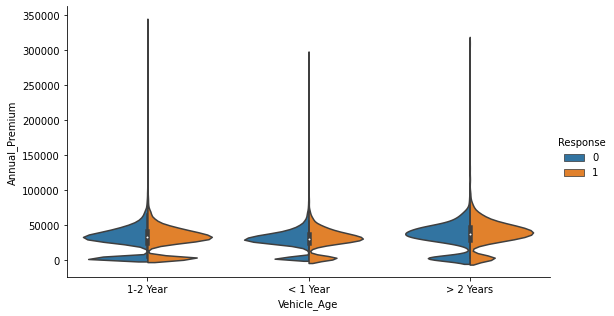

In [91]:
sns.catplot(data=train, 
            kind="violin", 
            x="Vehicle_Age", 
            y="Annual_Premium", 
            hue="Response", 
            split=True, height=4.5, aspect=14/8)
plt.show()

On remarque que la distribution des primes est significativement différente pour les véhicules ayant plus de deux ans d'age en fonction qu'ils aient déjà eu ou non un accident.

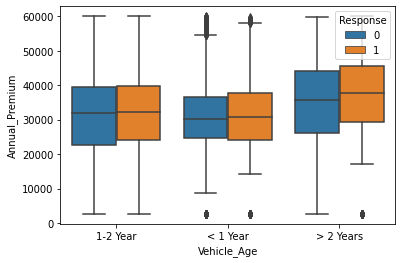

In [75]:
sns.boxplot(data = train[train["Annual_Premium"] < 60000],
            x="Vehicle_Age", 
            y="Annual_Premium", 
            hue="Response")
plt.show()

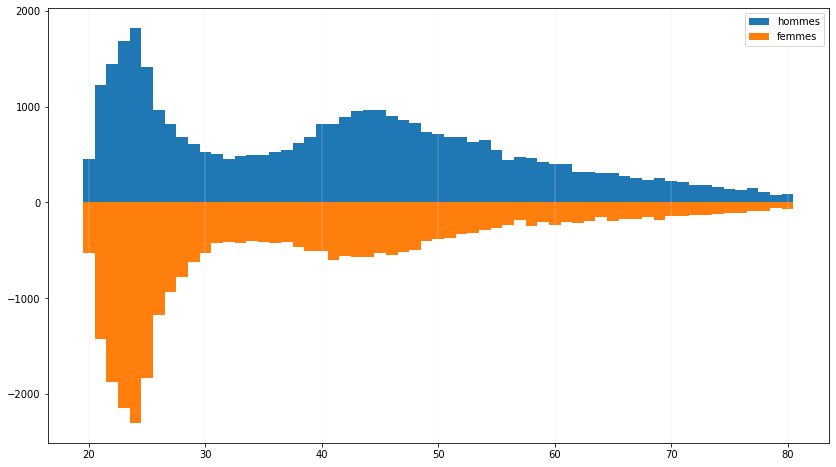

In [88]:
data = pd.read_csv("https://www.data.mclavier.com/prj_datascience/brut_train.csv")

# Léger changements revu à la prochaine page
data['Gender'] = data['Gender'].replace({'Female':2,'Male':1})
data['Vehicle_Age'] = data['Vehicle_Age'].replace({'< 1 Year':1,'1-2 Year':2, '> 2 Years':3})
data['Vehicle_Damage'] = data['Vehicle_Damage'].replace({'Yes':1,'No':0})
data.drop(data[data['Driving_License'] == 0 ].index, inplace=True)
data.drop(data[data['Age'] >80 ].index, inplace=True)

nb_femmes=data[data['Gender'] == 2]
somme_f = nb_femmes.groupby('Age').count()
nb_femmes = somme_f['Gender']
nb_femmes = -np.array(nb_femmes)

nb_hommes=data[data['Gender'] == 1]
somme_h = nb_hommes.groupby('Age').count()
nb_hommes = somme_h['Gender']
nb_hommes = np.array(nb_hommes)
nb_hommes.resize(nb_femmes.shape)

ages=range(20,20+len(nb_femmes))

plt.figure(figsize=(14,8))
plt.bar(ages,nb_hommes,width=1,label="hommes")
plt.bar(ages,nb_femmes,width=1,label="femmes")
xticks=np.arange(20,90,10)
plt.xticks(xticks)
for x in xticks: plt.axvline(x,color="0.9",linewidth=0.3)
plt.legend()
plt.show()

<br><br><br><br>